In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G1 = nx.DiGraph()
G1.add_edge("A", "B")
G1.add_node("C")

G2 = nx.DiGraph()
G2.add_edge("B", "C")
G2.add_node("D")

merged_graph = nx.compose_all([G1, G2])

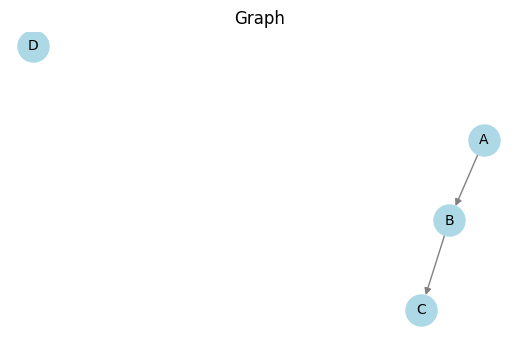

In [15]:
plt.figure(figsize=(5, 3))
pos = nx.spring_layout(
    merged_graph
)  # or use another layout like nx.kamada_kawai_layout
nx.draw(
    merged_graph,
    pos,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=500,
    font_size=10,
)
plt.title("Graph")
plt.show()

I'll add functionality to search for nodes in the graph using NetworkX. We'll create two functions:
1. One to find a node by exact name match
2. Another to find nodes containing a search term (partial match)

In [4]:
def find_node(G, node_name):
    """Find node by exact name"""
    if node_name in G.nodes():
        return node_name
    return None


def search_nodes(G, search_term):
    """Find nodes containing search term"""
    matching_nodes = [node for node in G.nodes() if search_term.lower() in str(node).lower()]
    return matching_nodes


# Example usage
search_term = "B"
matches = search_nodes(merged_graph, search_term)
print(f"Nodes containing '{search_term}':")
for node in matches:
    print(f"- {node}")

Nodes containing 'B':
- B


The code above allows you to:
- Find an exact node match using `find_node()`
- Search for nodes containing a term using `search_nodes()`

You can modify the search_term to find different nodes in your graph.

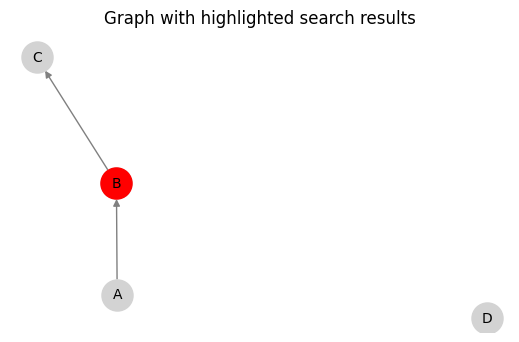

In [14]:
# Visualize the search results by highlighting matched nodes
plt.figure(figsize=(5, 3))
pos = nx.spring_layout(merged_graph)

# Draw all nodes in light gray first
nx.draw(merged_graph, pos, node_color='lightgray', edge_color='gray',
        with_labels=True, node_size=500, font_size=10)

# Highlight matching nodes in red
matching_nodes = search_nodes(merged_graph, search_term)
nx.draw_networkx_nodes(merged_graph, pos, nodelist=matching_nodes,
                       node_color='red', node_size=500)

plt.title("Graph with highlighted search results")
plt.show()
